# Ride Price Estimation System
Mini Machine Learning Project

Learning Problem

We aim to build a machine learning system that estimates ride price using trip characteristics. This is a supervised learning regression task because the model learns from labeled examples where ride features are paired with prices.

Supervised learning involves providing training data with known outputs (labels/targets), allowing the model to learn relationships between features and outcomes.

Why ML Instead of Rules?

Fixed rules like:

price = distance × rate


cannot capture:

Traffic variability

Weather effects

Demand surges

Complex nonlinear interactions

ML learns these relationships automatically from data.

What the Model Learns

The model learns a mapping:

(distance, duration, traffic, demand, etc.) → ride_price

#Dataset Design
Selected Features
| Feature       | Reason                             |
| ------------- | ---------------------------------- |
| distance_km   | Longer rides cost more             |
| duration_min  | Time impacts driver cost           |
| time_of_day   | Peak hours increase price          |
| traffic_level | High traffic raises duration/price |
| weather       | Bad weather increases demand       |
| demand_level  | Surge pricing                      |
| passengers    | Larger groups cost more            |

#Excluded Feature

Driver rating
Considered but removed
Hard to collect reliably
Weak direct impact on price

In [10]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 200

data = pd.DataFrame({
    "distance_km": np.random.uniform(1, 20, n),
    "duration_min": np.random.uniform(5, 60, n),
    "time_of_day": np.random.choice(["morning","afternoon","evening","night"], n),
    "traffic_level": np.random.choice(["low","medium","high"], n),
    "weather": np.random.choice(["clear","rain","storm"], n),
    "demand_level": np.random.choice(["low","normal","high"], n),
    "passengers": np.random.randint(1,5,n)
})

# price formula
data["ride_price"] = (
    2*data.distance_km +
    0.5*data.duration_min +
    data.passengers*1.5 +
    np.random.normal(0,3,n)
)

data.to_csv("rides.csv", index=False)
data.head()


,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,passengers,ride_price
0,8.116262,40.311741,morning,medium,storm,normal,3,42.012150
1,19.063572,9.627698,afternoon,high,rain,normal,4,45.794508
2,14.907885,13.889579,morning,low,rain,high,3,34.902487
3,12.374511,54.420480,morning,low,rain,high,3,55.406667
4,3.964354,38.353598,afternoon,low,storm,high,3,28.467769


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance_km    200 non-null    float64
 1   duration_min   200 non-null    float64
 2   time_of_day    200 non-null    object 
 3   traffic_level  200 non-null    object 
 4   weather        200 non-null    object 
 5   demand_level   200 non-null    object 
 6   passengers     200 non-null    int64  
 7   ride_price     200 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 12.6+ KB


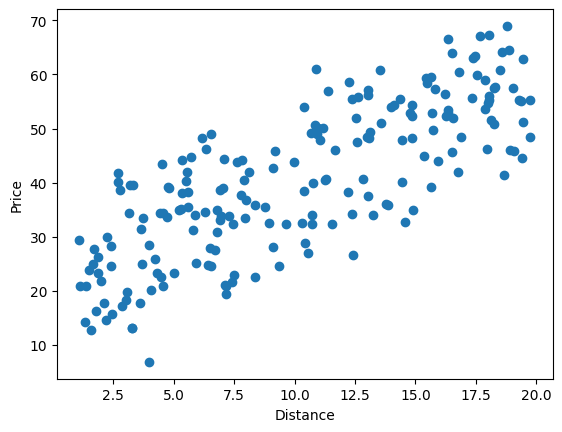

In [11]:
import matplotlib.pyplot as plt

data.info()
data.isnull().sum()

plt.scatter(data.distance_km, data.ride_price)
plt.xlabel("Distance")
plt.ylabel("Price")
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data.drop("ride_price", axis=1)
y = data["ride_price"]

num_cols = ["distance_km","duration_min","passengers"]
cat_cols = ["time_of_day","traffic_level","weather","demand_level"]

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

reg_model = Pipeline([
    ("prep", preprocess),
    ("model", LinearRegression())
])

reg_model.fit(X_train, y_train)

pred = reg_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test,pred))


MAE: 2.8260253554168613


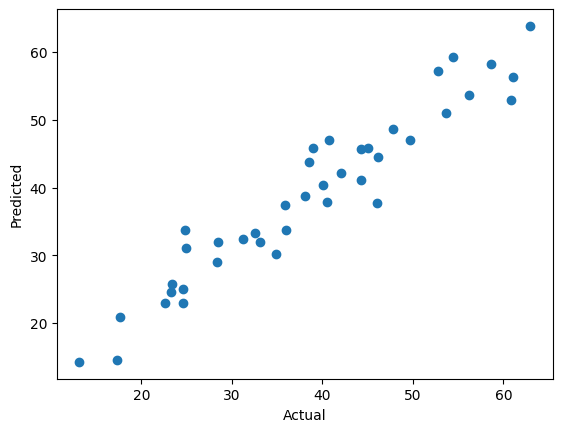

In [14]:
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [15]:
data["high_cost"] = (data.ride_price > data.ride_price.median()).astype(int)

Xc = data.drop(["ride_price","high_cost"], axis=1)
yc = data["high_cost"]

X_train,X_test,y_train,y_test = train_test_split(Xc,yc,test_size=0.2)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

clf = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

clf.fit(X_train,y_train)
pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))


Accuracy: 0.975
[[24  1]
 [ 0 15]]


In [16]:
data.to_csv("rides.csv", index=False)